In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_C_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,NaN
1,0.0453,0.0523,NaN,0.0689,0.1183,0.2583,0.2156,NaN,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,NaN
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,NaN,0.0121,0.0036,NaN,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,NaN,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,NaN,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	14
float64		column 2	16
float64		column 3	13
float64		column 4	8
float64		column 5	13
float64		column 6	11
float64		column 7	9
float64		column 8	5
float64		column 9	8
float64		column 10	8
float64		column 11	9
float64		column 12	8
float64		column 13	10
float64		column 14	5
float64		column 15	10
float64		column 16	12
float64		column 17	13
float64		column 18	20
float64		column 19	8
float64		column 20	18
float64		column 21	7
float64		column 22	10
float64		column 23	6
float64		column 24	11
float64		column 25	10
float64		column 26	8
float64		column 27	15
float64		column 28	7
float64		column 29	4
float64		column 30	8
float64		column 31	13
float64		column 32	8
float64		column 33	11
float64		column 34	6
float64		column 35	16
float64		column 36	8
float64		column 37	12
float64		column 38	12
float64		column 39	10
float64		column 40	13
float64		column 41	7
float64		column 42	12
float64		column 43	19
float64		column 44	9
float64		column 45	11
f

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,194.000000,192.000000,195.000000,200.000000,195.000000,197.000000,199.000000,203.000000,200.000000,200.000000,...,196.000000,197.000000,200.000000,199.000000,193.000000,200.000000,201.000000,198.000000,198.000000,194.000000
mean,0.028577,0.038563,0.043133,0.054039,0.075552,0.104046,0.122630,0.134545,0.179176,0.207840,...,0.016087,0.013563,0.010823,0.010933,0.009433,0.008290,0.007856,0.008004,0.007947,0.006490
std,0.022548,0.033282,0.038467,0.047256,0.056553,0.059005,0.062814,0.083991,0.119652,0.133555,...,0.012232,0.009637,0.007130,0.007296,0.007173,0.005797,0.005861,0.006573,0.006213,0.005050
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013125,0.016450,0.018900,0.024200,0.036600,0.067100,0.078650,0.080900,0.096025,0.117150,...,0.008175,0.007400,0.005350,0.005450,0.004300,0.004400,0.003700,0.003600,0.003625,0.003025
50%,0.022400,0.030800,0.033400,0.043600,0.063000,0.090600,0.109800,0.112300,0.155250,0.184250,...,0.013850,0.011600,0.009650,0.009300,0.007700,0.006850,0.006000,0.005750,0.006550,0.005300
75%,0.034900,0.047950,0.055050,0.064675,0.101050,0.134100,0.158700,0.169300,0.235500,0.267500,...,0.020825,0.016800,0.015100,0.014300,0.012100,0.010850,0.010500,0.010500,0.010175,0.008500
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

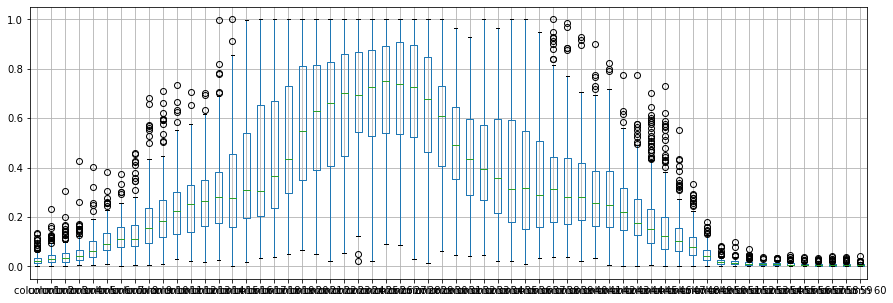

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.028577
column 2     0.038563
column 3     0.043133
column 4     0.054039
column 5     0.075552
column 6     0.104046
column 7     0.122630
column 8     0.134545
column 9     0.179176
column 10    0.207840
column 11    0.235894
column 12    0.250740
column 13    0.273285
column 14    0.295067
column 15    0.318902
column 16    0.382513
column 17    0.412917
column 18    0.446863
column 19    0.498928
column 20    0.565386
column 21    0.606472
column 22    0.618919
column 23    0.646910
column 24    0.672779
column 25    0.675779
column 26    0.695716
column 27    0.700245
column 28    0.689670
column 29    0.639097
column 30    0.578049
column 31    0.508113
column 32    0.443692
column 33    0.422150
column 34    0.404868
column 35    0.395454
column 36    0.378691
column 37    0.357196
column 38    0.343076
column 39    0.326229
column 40    0.309775
column 41    0.287083
column 42    0.279150
column 43    0.241433
column 44    0.213874
column 45    0.199381
column 46 

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.737183,0.581651,0.516708,0.385480,0.239208,0.293178,0.353540,0.355183,0.348023,...,0.173201,0.321002,0.272961,0.296996,0.254391,0.245323,0.307741,0.349520,0.300180,0.336769
column 2,0.737183,1.000000,0.774973,0.620138,0.433775,0.352099,0.308634,0.357980,0.334673,0.321829,...,0.313443,0.454782,0.335818,0.391575,0.376130,0.248955,0.287950,0.356740,0.323100,0.334807
column 3,0.581651,0.774973,1.000000,0.796296,0.563860,0.325743,0.169045,0.198337,0.218437,0.195733,...,0.215298,0.396969,0.329413,0.364763,0.252987,0.256510,0.361624,0.318462,0.399109,0.374869
column 4,0.516708,0.620138,0.796296,1.000000,0.734148,0.386251,0.250337,0.243031,0.255100,0.246911,...,0.179685,0.388323,0.360882,0.345252,0.269563,0.286284,0.348301,0.336950,0.412756,0.406875
column 5,0.385480,0.433775,0.563860,0.734148,1.000000,0.615474,0.329522,0.182757,0.177139,0.188879,...,0.123730,0.275248,0.317198,0.201000,0.201235,0.219748,0.239406,0.235836,0.286527,0.291850
column 6,0.239208,0.352099,0.325743,0.386251,0.615474,1.000000,0.700123,0.485475,0.357495,0.342073,...,0.178048,0.269718,0.153628,0.184630,0.123436,0.188951,0.164208,0.220788,0.190599,0.163270
column 7,0.293178,0.308634,0.169045,0.250337,0.329522,0.700123,1.000000,0.667905,0.477737,0.438350,...,0.217114,0.153700,0.045029,0.175663,0.202687,0.186203,0.206522,0.255319,0.159129,0.236926
column 8,0.353540,0.357980,0.198337,0.243031,0.182757,0.485475,0.667905,1.000000,0.780158,0.654259,...,0.273132,0.216652,0.095336,0.258944,0.216626,0.266154,0.258922,0.296965,0.192810,0.165342
column 9,0.355183,0.334673,0.218437,0.255100,0.177139,0.357495,0.477737,0.780158,1.000000,0.872943,...,0.181175,0.214787,0.110311,0.235123,0.163909,0.247783,0.204502,0.264865,0.126317,0.139127
column 10,0.348023,0.321829,0.195733,0.246911,0.188879,0.342073,0.438350,0.654259,0.872943,1.000000,...,0.173900,0.164932,0.110159,0.176564,0.132789,0.153627,0.167953,0.199653,0.066388,0.097800


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+20,60+20+20,60+20+20+20,60+20+20,60+20,60], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 18.026449496929462
Epoch: 1 , loss: 17.765982701228214
Epoch: 2 , loss: 17.64346694946289
Epoch: 3 , loss: 17.60058226952186
Epoch: 4 , loss: 17.537677764892578
Epoch: 5 , loss: 17.45934589092548
Epoch: 6 , loss: 17.34182753929725
Epoch: 7 , loss: 17.245448332566482
Epoch: 8 , loss: 17.157800674438477
Epoch: 9 , loss: 17.026562910813553
Epoch: 10 , loss: 16.868873082674465
Epoch: 11 , loss: 16.757187109727127
Epoch: 12 , loss: 16.47201758164626
Epoch: 13 , loss: 16.10719394683838
Epoch: 14 , loss: 15.707092505234938
Epoch: 15 , loss: 15.187369640056904
Epoch: 16 , loss: 14.302327669583834
Epoch: 17 , loss: 13.23647403717041
Epoch: 18 , loss: 11.932480738713192
Epoch: 19 , loss: 10.717962265014648
Epoch: 20 , loss: 10.150108924278847
Epoch: 21 , loss: 9.849739734943096
Epoch: 22 , loss: 9.383586443387545
Epoch: 23 , loss: 9.32076879648062
Epoch: 24 , loss: 9.229030168973482
Epoch: 25 , loss: 9.154123526

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.022676
column 2     0.057500
column 3     0.084200
column 4     0.037200
column 5     0.045800
column 6     0.077100
column 7     0.077100
column 8     0.113000
column 9     0.235300
column 10    0.183800
column 11    0.286900
column 12    0.412900
column 13    0.364700
column 14    0.198400
column 15    0.284000
column 16    0.403900
column 17    0.583700
column 18    0.286361
column 19    0.608600
column 20    0.485800
column 21    0.324600
column 22    0.201300
column 23    0.208200
column 24    0.168600
column 25    0.248400
column 26    0.273600
column 27    0.461958
column 28    0.465500
column 29    0.699000
column 30    0.747400
column 31    0.795600
column 32    0.798100
column 33    0.671500
column 34    0.694200
column 35    0.744000
column 36    0.252523
column 37    0.891200
column 38    1.000000
column 39    0.875300
column 40    0.706100
column 41    0.680300
column 42    0.589800
column 43    0.461800
column 44    0.363900
column 45    0.149200
column 46 

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.005689
1,0.000000,0.0,-0.046459,0.0,0.0,0.0,0.0,-0.258938,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000532
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.001526,0.000000,0.0,0.001785,0.0,0.0,0.0,0.0,0.0,0.000000
4,-0.045774,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
204,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
205,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
206,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.004639,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

4.67981466679194

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.10502030723427794

In [19]:
new_df.iloc[66,:]

column 1     0.02650
column 2     0.04400
column 3     0.01370
column 4     0.00840
column 5     0.03050
column 6     0.04380
column 7     0.03410
column 8     0.07800
column 9     0.08440
column 10    0.07790
column 11    0.03270
column 12    0.20600
column 13    0.19080
column 14    0.10650
column 15    0.14570
column 16    0.22320
column 17    0.20700
column 18    0.11050
column 19    0.10780
column 20    0.11650
column 21    0.22240
column 22    0.06890
column 23    0.20600
column 24    0.23840
column 25    0.09040
column 26    0.22780
column 27    0.58720
column 28    0.84570
column 29    0.84670
column 30    0.76790
column 31    0.80550
column 32    0.62600
column 33    0.65450
column 34    0.87470
column 35    0.98850
column 36    0.93480
column 37    0.69600
column 38    0.57330
column 39    0.58720
column 40    0.22984
column 41    0.56510
column 42    0.52470
column 43    0.36840
column 44    0.19970
column 45    0.15120
column 46    0.05080
column 47    0.09310
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.020000,0.0371,0.042800,0.0207,0.0954,0.0986,0.1539,0.160100,0.3109,0.2111,...,0.023200,0.002700,0.0065,0.015900,0.0072,0.0167,0.0180,0.0084,0.0090,0.008889
1,0.045300,0.0523,0.037841,0.0689,0.1183,0.2583,0.2156,0.089162,0.3337,0.2872,...,0.012500,0.008400,0.0089,0.004800,0.0094,0.0191,0.0140,0.0049,0.0052,0.004932
2,0.026200,0.0582,0.109900,0.1083,0.0974,0.2280,0.2431,0.377100,0.5598,0.6194,...,0.003300,0.023200,0.0166,0.009500,0.0180,0.0244,0.0316,0.0164,0.0095,0.007800
3,0.010000,0.0171,0.062300,0.0205,0.0205,0.0368,0.1098,0.127600,0.0598,0.1264,...,0.025626,0.012100,0.0036,0.016785,0.0085,0.0073,0.0050,0.0044,0.0040,0.011700
4,0.030426,0.0666,0.048100,0.0394,0.0590,0.0649,0.1209,0.246700,0.3564,0.4459,...,0.015600,0.003100,0.0054,0.010500,0.0110,0.0015,0.0072,0.0048,0.0107,0.009400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018700,0.0346,0.016800,0.0177,0.0393,0.1630,0.2028,0.169400,0.2328,0.2684,...,0.020300,0.011600,0.0098,0.019900,0.0033,0.0101,0.0065,0.0115,0.0193,0.015700
204,0.032300,0.0101,0.029800,0.0564,0.0760,0.0958,0.0990,0.101800,0.1030,0.2154,...,0.005100,0.006100,0.0093,0.013500,0.0063,0.0063,0.0034,0.0032,0.0062,0.006700
205,0.052200,0.0437,0.018000,0.0292,0.0351,0.1171,0.1257,0.117800,0.1258,0.2529,...,0.015500,0.016000,0.0029,0.005100,0.0062,0.0089,0.0140,0.0138,0.0077,0.003100
206,0.030300,0.0353,0.049000,0.0608,0.0167,0.1354,0.1465,0.112300,0.1945,0.2354,...,0.004200,0.013239,0.0046,0.012600,0.0036,0.0035,0.0034,0.0079,0.0036,0.004800


In [21]:
imputations[-1].to_excel("Sonar_C_5(imp).xlsx", index=False, header=False)